## Assignment 05 - Basic statistics & plotting

In [1]:
# IMPORTING LIBRARIES:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

* COL1 = 2020 USA's daily Cases
* COL2= COL21 =month + COL22 = Data.Cases
* COL3 = 2020 USA's death


In [2]:
df=pd.read_csv('covid.csv')
df.head(5)

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,0,0,Afghanistan,AFG,38041757,Asia,0.0
1,31,12,2019,0,0,Algeria,DZA,43053054,Africa,0.0
2,31,12,2019,0,0,Armenia,ARM,2957728,Europe,0.0
3,31,12,2019,0,0,Australia,AUS,25203200,Oceania,0.0
4,31,12,2019,0,0,Austria,AUT,8858775,Europe,0.0


##### Merging Date.Month + Date.Day+ Date.Year into new column 'Date'

In [3]:
df1 = df.copy()  
df['Date.Year']= df1['Date.Year'].astype(str)  
df['Date.Month']= df1['Date.Month'].astype(str)  
df['Date.Day']= df1['Date.Day'].astype(str)  
df.insert(3, column="Date", value=(df['Date.Month']+'/'+df['Date.Day']+'/'+df['Date.Year']))
df

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,12/31/2019,0,0,Afghanistan,AFG,38041757,Asia,0.000000
1,31,12,2019,12/31/2019,0,0,Algeria,DZA,43053054,Africa,0.000000
2,31,12,2019,12/31/2019,0,0,Armenia,ARM,2957728,Europe,0.000000
3,31,12,2019,12/31/2019,0,0,Australia,AUS,25203200,Oceania,0.000000
4,31,12,2019,12/31/2019,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,12/10/2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,12/11/2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,12/12/2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,12/13/2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776


In [4]:
 # Only considering 'United_States_of_America' for the analysis
df3=df.loc[df['Location.Country']=='United_States_of_America']
df3

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
65,31,12,2019,12/31/2019,0,0,United_States_of_America,USA,329064917,America,0.000000
132,1,1,2020,1/1/2020,0,0,United_States_of_America,USA,329064917,America,0.000000
199,2,1,2020,1/2/2020,0,0,United_States_of_America,USA,329064917,America,0.000000
266,3,1,2020,1/3/2020,0,0,United_States_of_America,USA,329064917,America,0.000000
333,4,1,2020,1/4/2020,0,0,United_States_of_America,USA,329064917,America,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
52732,1,11,2020,11/1/2020,78934,848,United_States_of_America,USA,329064917,America,309.850412
52944,2,11,2020,11/2/2020,81001,440,United_States_of_America,USA,329064917,America,319.926843
53156,3,11,2020,11/3/2020,83883,555,United_States_of_America,USA,329064917,America,327.136059
53368,4,11,2020,11/4/2020,92734,1076,United_States_of_America,USA,329064917,America,337.524586


Text(0.5, 1.0, '2021 USA daily patients curve')

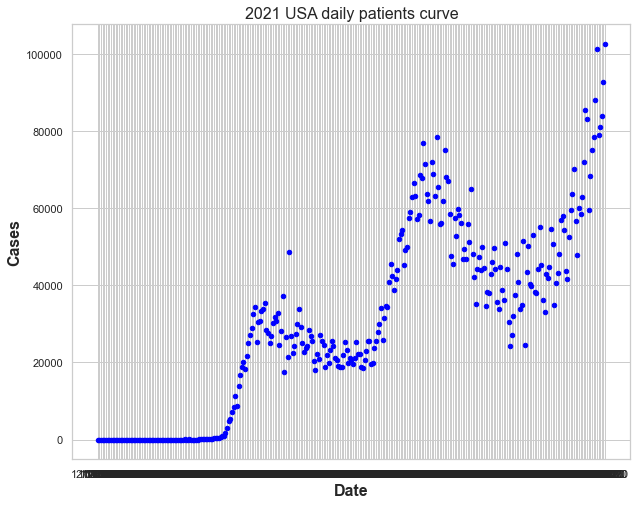

In [77]:
Date=df3.plot.scatter(x='Date', y='Data.Cases', figsize=(10,8) ,color='blue')
Date.set_xlabel('Date',fontsize=16, fontweight='bold')
Date.set_ylabel('Cases',fontsize=16, fontweight='bold')
Date.set_title('2021 USA daily patients curve',fontsize=16, )
# Technically makes sense that as time passed the casess increase, and the valleys represent the 1st and second wave of infection; however, the visual looks very akward if not organized on the X axis

### MEAN, MEDIAN, and MODE

In [6]:
## Mean
COL1_Mean=round(df3['Data.Cases'].mean(),2)
COL1_Mean

30503.17

In [8]:
## Median
COL1_Median=round(df3['Data.Cases'].median(),2)
COL1_Median

27762.0

In [9]:
## Mode
COL1_Mode=round(df3['Data.Cases'].mode(),2)
COL1_Mode

0    0
dtype: int64

### TRIMED_MEAN n= 10% = 0.1

In [11]:
COL1_trim_mean=round(trim_mean(df3['Data.Cases'],0.1),2)
COL1_trim_mean

28757.84

In [12]:
casesrange = pd.cut(df['Data.Cases'], 100)
print(casesrange.value_counts())

(-507.24, 600.44]        45462
(600.44, 1708.12]         4234
(1708.12, 2815.8]         1176
(2815.8, 3923.48]          620
(3923.48, 5031.16]         451
                         ...  
(-3830.28, -2722.6]          0
(-4937.96, -3830.28]         0
(98076.28, 99183.96]         0
(99183.96, 100291.64]        0
(-6045.64, -4937.96]         0
Name: Data.Cases, Length: 100, dtype: int64


#### Data Cases

In [13]:
df4 = pd.concat([df, casesrange], axis=1)
df4 = df3.sort_values(by='Data.Cases')
df4

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
65,31,12,2019,12/31/2019,0,0,United_States_of_America,USA,329064917,America,0.000000
1665,24,1,2020,1/24/2020,0,0,United_States_of_America,USA,329064917,America,0.000304
3876,26,2,2020,2/26/2020,0,0,United_States_of_America,USA,329064917,America,0.012156
1799,26,1,2020,1/26/2020,0,0,United_States_of_America,USA,329064917,America,0.000608
3742,24,2,2020,2/24/2020,0,0,United_States_of_America,USA,329064917,America,0.006990
...,...,...,...,...,...,...,...,...,...,...,...
51040,24,10,2020,10/24/2020,85329,953,United_States_of_America,USA,329064917,America,251.923848
52308,30,10,2020,10/30/2020,88130,968,United_States_of_America,USA,329064917,America,293.640844
53368,4,11,2020,11/4/2020,92734,1076,United_States_of_America,USA,329064917,America,337.524586
52520,31,10,2020,10/31/2020,101273,1040,United_States_of_America,USA,329064917,America,303.066644


### COL1 Histogram
#### Mode <median < trimmed mean < mean

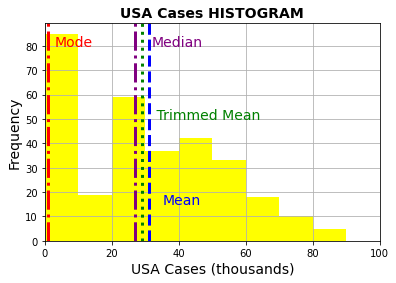

In [19]:
ax = (df3['Data.Cases'] / 1000).plot.hist(xlim=[0, 100], 
                                    bins=range(0,100,10), figsize=(6, 4), color='yellow')
ax.set_xlabel('USA Cases (thousands)',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
ax.set_title('USA Cases HISTOGRAM',fontsize=14,fontweight='bold')
plt.text(3,80,'Mode',fontsize=14, color='red')
plt.text(32,80,'Median',fontsize=14, color='purple')
plt.text(32,50,' Trimmed Mean',fontsize=14, color='green')
plt.text(35,15,'Mean',fontsize=14, color='blue')
ax.axvline(1,color='r',linestyle='dashdot', lw=3)
ax.axvline(27,color='purple',linestyle='dashdot', lw=3)
ax.axvline(29,color='green',linestyle='dotted', lw=3)
ax.axvline(31,color='blue',linestyle='--', lw=3)
plt.grid()

* This is a right-skewed distribution, which has a peak to the left of the distribution and data values that taper off to the right. 
* This distribution has a single peak and is also unimodal. For a histogram that is skewed to the right, the mean is located to the right on the distribution and is the largest value of the measures of central tendency.
* The mean has the largest value because it is strongly affected by the outliers on the right tail that pull the mean to the right. 
* The mode is the smallest value, and it is located to the left on the distribution. The mode always occurs at the highest point of the peak. The median is located between the mode and the mean.

In [20]:
print(np.average(df3['Data.Cases'], weights=df3['Data.Cases']))

49773.70571547779


* mean absolute deviation
* the standard deviation
* interquartile ranges

##### mean absolute deviation

In [21]:
print(robust.scale.mad(df3['Data.Cases']))
print(abs(df3['Data.Cases'] - df3['Data.Cases'].median()).median() / 0.6744897501960817)

31625.387922942995
31625.387922942995


##### standard deviation

In [22]:
df3['Data.Cases'].std()

24283.916309543823

##### interquartile range

In [23]:
df3['Data.Cases'].quantile(0.75)-df3['Data.Cases'].quantile(0.25)

46625.5

### DATA CASES BOXPLOT

In [24]:
a=df3['Data.Cases'].quantile(0.25)
b=df3['Data.Cases'].quantile(0.50)
c=df3['Data.Cases'].quantile(0.75)
a, b, c

(1326.5, 27762.0, 47952.0)

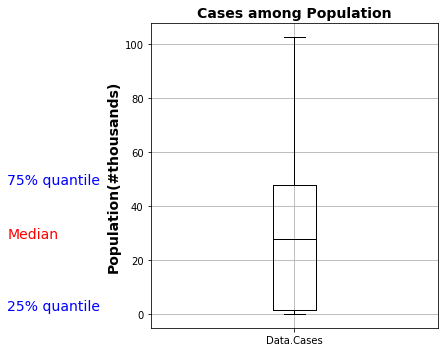

In [25]:
ax=(df3['Data.Cases']/1000).plot.box(figsize=(7,5),color='black')
ax.set_ylabel('Population(#thousands)',fontsize=14,fontweight='bold')
ax.set_title('Cases among Population',fontsize=14,fontweight='bold')

plt.text(0,48,'75% quantile',fontsize=14, color='blue')
plt.text(0,28,'Median',fontsize=14, color='red')
plt.text(0,1.3,'25% quantile',fontsize=14, color='blue')
plt.grid()
plt.tight_layout()

#####  Agrouping cathegorical values 'month' to int from string

In [26]:
df4=df3.drop(65)
df5=df4.copy()
df4['Date.Month']=df5['Date.Month'].astype(int)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 132 to 53579
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date.Day            310 non-null    object 
 1   Date.Month          310 non-null    int32  
 2   Date.Year           310 non-null    object 
 3   Date                310 non-null    object 
 4   Data.Cases          310 non-null    int64  
 5   Data.Deaths         310 non-null    int64  
 6   Location.Country    310 non-null    object 
 7   Location.Code       310 non-null    object 
 8   Data.Population     310 non-null    int64  
 9   Location.Continent  310 non-null    object 
 10  Data.Rate           310 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(6)
memory usage: 27.9+ KB


In [27]:
df4=df4.groupby('Date.Month').sum()
df4

,Data.Cases,Data.Deaths,Data.Population,Data.Rate
Date.Month,,,,
1,6,0,10201012427,0.010332
2,60,0,9542882593,0.137663
3,164554,3170,10201012427,275.032662
4,875289,57796,9871947510,3380.417792
5,730475,42815,10201012427,3274.059446
6,820168,22359,9871947510,3047.026432
7,1904462,25930,10201012427,7332.467776
8,1502149,30999,10201012427,7033.964061
9,1193898,22929,9871947510,5083.610296


##### BARPLOT: Month vs Death

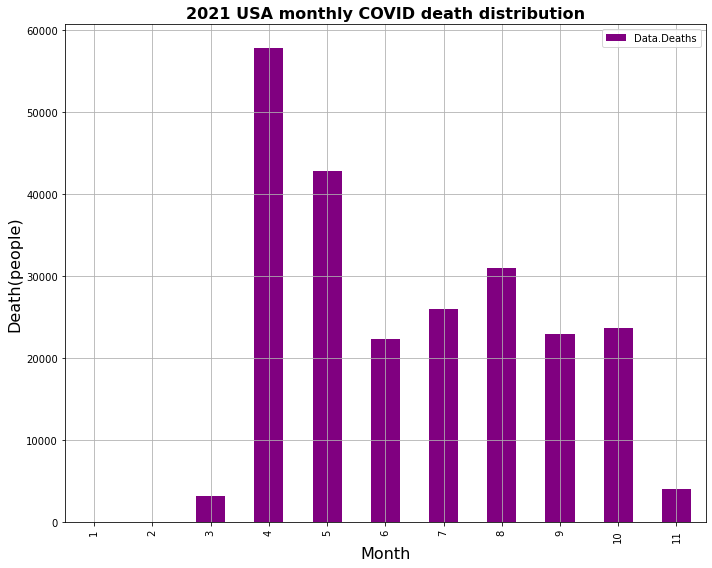

In [28]:
amdeath=df4.plot.bar(y='Data.Deaths', figsize=(10,8),legend=True, color='Purple')
amdeath.set_xlabel('Month',fontsize=16)
amdeath.set_ylabel('Death(people)',fontsize=16)
amdeath.set_title('2021 USA monthly COVID death distribution',fontsize=16, fontweight='bold')

plt.tight_layout()
plt.grid()
plt.show()

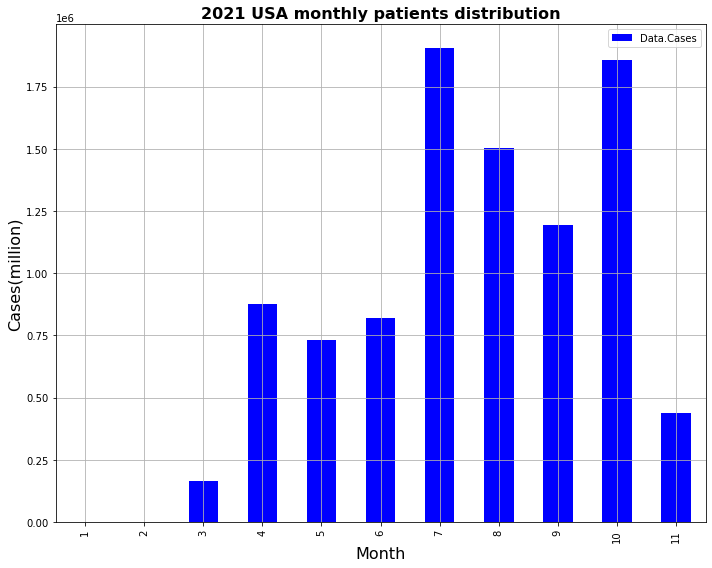

In [29]:
amcases=df4.plot(kind='bar', y='Data.Cases', figsize=(10,8),legend=True, color='Blue')
amcases.set_xlabel('Month',fontsize=16)
amcases.set_ylabel('Cases(million)',fontsize=16)
amcases.set_title('2021 USA monthly patients distribution',fontsize=16, fontweight='bold')

plt.tight_layout()
plt.grid()
plt.show()

In [31]:
df3[df3['Data.Deaths']>=3000]

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
11173,16,4,2020,4/16/2020,30148,4928,United_States_of_America,USA,329064917,America,128.528743
11583,18,4,2020,4/18/2020,30833,3770,United_States_of_America,USA,329064917,America,128.910430
12813,24,4,2020,4/24/2020,26543,3179,United_States_of_America,USA,329064917,America,122.510477


##### 2020 USA cases V.S death scatter plot

NameError: name 'scatter' is not defined

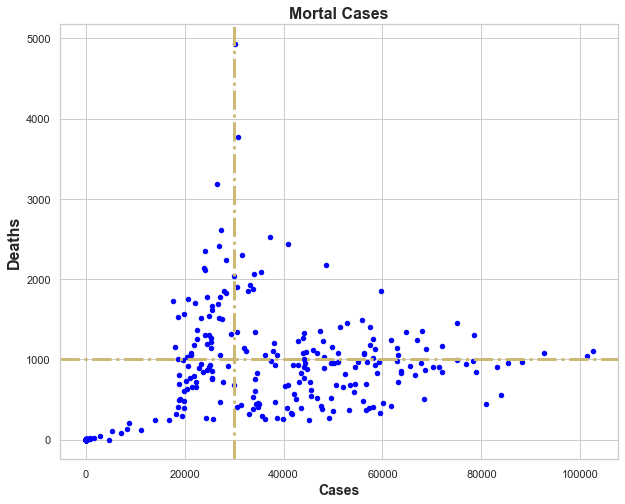

In [70]:
ascatter=df3.plot.scatter(x='Data.Cases', y='Data.Deaths', figsize=(10,8),legend=True, color='Blue')
ascatter.set_xlabel('Cases', fontsize=14, fontweight='bold')
ascatter.set_ylabel('Deaths', fontsize=16, fontweight='bold')
ascatter.set_title('Mortal Cases',fontsize=16, fontweight='bold')
ascatter.axhline(1000,color='y',linestyle='dashdot', lw=3)
ascatter.axvline(30000,color='y',linestyle='dashdot', lw=3)
ax.legend(['COVID patients'])
scatter.grid()
plt.show()

##### Interre The death rate and the daily cases have a strong correlation with the mortality

##### Hexagonal binning plot: COL1 vs COL3 

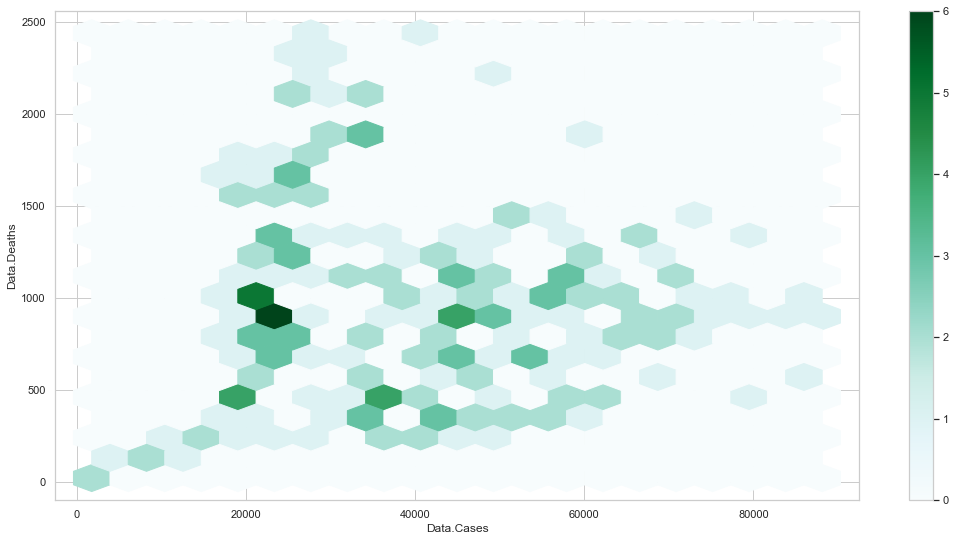

In [72]:
df6=df3.loc[(df3['Data.Cases'] >500) & (df3['Data.Deaths'] >20) & (df3['Data.Cases'] <90000) & (df3['Data.Deaths'] <2500)]
ax = df6.plot.hexbin(x='Data.Cases', y='Data.Deaths',
                         gridsize=20, sharex=False, figsize=(18, 9))

In [85]:
# I interpreted this as 1000 deaths from every 20000 infections or a ratio or mortality infection 1:20

#### DATAFRAME OF COUNTRY'S CASES PER MONTH

In [73]:
df7=df.loc[df['Date.Year']==2020]
crosstab = df7.pivot_table(values = 'Data.Cases', index='Location.Country', columns='Date.Month', 
                                aggfunc='sum', margins=True)
crosstab

Date.Month,1,2,3,4,5,6,7,8,9,10,11,12,All
Location.Country,,,,,,,,,,,,,
Afghanistan,0.0,1.0,140.0,1808.0,12576.0,16713.0,5304.0,1620.0,1092.0,2171.0,4419.0,3429.0,49273
Albania,NaN,NaN,223.0,543.0,356.0,1344.0,2731.0,4183.0,4138.0,7116.0,1666.0,NaN,22300
Algeria,0.0,1.0,583.0,3264.0,5419.0,4304.0,16260.0,14315.0,7222.0,6283.0,1876.0,NaN,59527
Andorra,NaN,NaN,370.0,373.0,21.0,91.0,67.0,202.0,842.0,2699.0,380.0,NaN,5045
Angola,NaN,NaN,7.0,20.0,57.0,192.0,802.0,1546.0,2281.0,5364.0,1308.0,NaN,11577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western_Sahara,NaN,NaN,NaN,6.0,17.0,185.0,558.0,0.0,0.0,0.0,0.0,NaN,766
Yemen,NaN,NaN,NaN,6.0,304.0,818.0,598.0,227.0,82.0,28.0,4.0,NaN,2067
Zambia,NaN,NaN,35.0,62.0,960.0,511.0,3987.0,6470.0,2690.0,1700.0,283.0,NaN,16698


In [35]:
df7 = crosstab.copy().loc['Afghanistan':'Zimbabwe',:]
df7.iloc[:,0:11] = df7.iloc[:,0:11].div(df7['All'], axis=0)
df7['All'] = df7['All'] / sum(df7['All'])
perc_crosstab = df7
print(perc_crosstab)

Date.Month           1         2         3         4         5         6  \
Location.Country                                                           
Afghanistan        0.0  0.000020  0.002841  0.036694  0.255231  0.339192   
Albania            NaN       NaN  0.010000  0.024350  0.015964  0.060269   
Algeria            0.0  0.000017  0.009794  0.054832  0.091034  0.072303   
Andorra            NaN       NaN  0.073340  0.073935  0.004163  0.018038   
Angola             NaN       NaN  0.000605  0.001728  0.004924  0.016585   
...                ...       ...       ...       ...       ...       ...   
Wallis_and_Futuna  NaN       NaN       NaN       NaN       NaN       NaN   
Western_Sahara     NaN       NaN       NaN  0.007833  0.022193  0.241514   
Yemen              NaN       NaN       NaN  0.002903  0.147073  0.395743   
Zambia             NaN       NaN  0.002096  0.003713  0.057492  0.030602   
Zimbabwe           NaN       NaN  0.000831  0.003204  0.016613  0.047466   

Date.Month 

##### Also, I chose COL22 = top10 countries top draw box plot

In [36]:
df8=df.loc[df['Date.Year']==2020]
df8check=df8.pivot_table(values = 'Data.Cases', index='Location.Country',
                                aggfunc='sum', margins=True)
df8final=df8check.sort_values(by='Data.Cases')
df8final.tail(10)

,Data.Cases
Location.Country,
United_Kingdom,1099059
Colombia,1108084
Argentina,1205915
Spain,1284408
France,1543321
Russia,1693454
Brazil,5590025
India,8364086
United_States_of_America,9486486


In [37]:
df8

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
67,1,1,2020,0,0,Afghanistan,AFG,38041757,Asia,0.000000
68,1,1,2020,0,0,Algeria,DZA,43053054,Africa,0.000000
69,1,1,2020,0,0,Armenia,ARM,2957728,Europe,0.000000
70,1,1,2020,0,0,Australia,AUS,25203200,Oceania,0.000000
71,1,1,2020,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776


In [38]:
df9=df8.loc[(df8['Location.Country']=='United_Kingdom') | (df8['Location.Country']=='Colombia')|
             (df8['Location.Country']=='Argentina') |(df8['Location.Country']=='Spain')|
              (df8['Location.Country']=='France') |(df8['Location.Country']=='Russia')|
             (df8['Location.Country']=='Brazil') |(df8['Location.Country']=='India')|
             (df8['Location.Country']=='United_States_of_America')]
df9

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
76,1,1,2020,0,0,Brazil,BRA,211049519,America,0.000000
89,1,1,2020,0,0,France,FRA,67012883,Europe,0.000000
94,1,1,2020,0,0,India,IND,1366417756,Asia,0.000000
120,1,1,2020,0,0,Russia,RUS,145872260,Europe,0.000000
124,1,1,2020,0,0,Spain,ESP,46937060,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...
53448,5,11,2020,40558,385,France,FRA,67012883,Europe,874.309497
53470,5,11,2020,50210,704,India,IND,1366417756,Asia,48.092174
53538,5,11,2020,19768,389,Russia,RUS,145872260,Europe,168.722278
53577,5,11,2020,25177,492,United_Kingdom,GBR,66647112,Europe,464.881359


In [39]:
df12=df9.groupby('Location.Code').sum()
df12

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
Location.Code,,,,,,,
ARG,3857,1630,492880,1205915,32520,10926484700,35437.029478
BRA,4821,1737,626200,5590025,161106,65425350890,36281.740117
COL,3828,1618,484800,1108084,32013,12081466320,29174.855988
ESP,4816,1726,624180,1284408,38118,14503551540,34126.180890
FRA,4821,1737,626200,1543321,38674,20773993730,26517.344433
GBR,4821,1737,626200,1099059,47742,20660604720,20034.294960
IND,4812,1734,624180,8364086,124315,422223086604,8263.407549
RUS,4821,1737,626200,1693454,29217,45220400600,15120.567817
USA,4821,1737,626200,9486486,233729,102010124270,37970.050148


##### Barplot: COL22 vs COL1

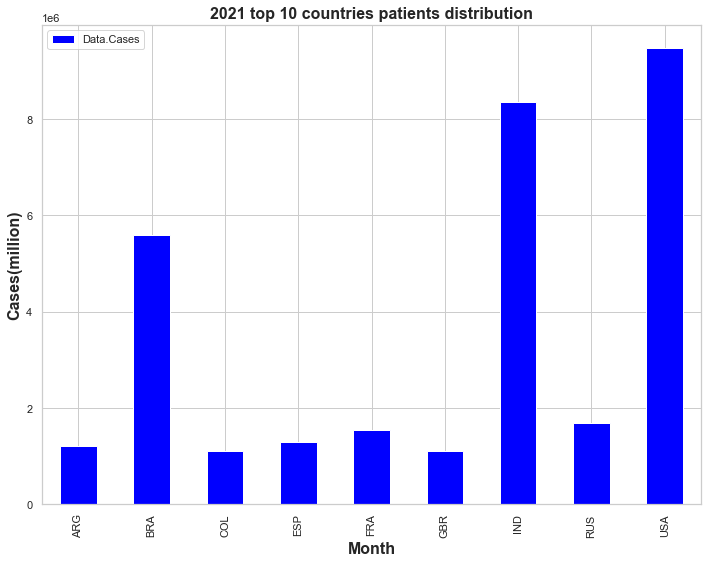

In [56]:
amccountry=df12.plot(kind='bar', y='Data.Cases', figsize=(10,8),legend=True, color='Blue')
amccountry.set_xlabel('Month',fontsize=16, fontweight='bold')
amccountry.set_ylabel('Cases(million)',fontsize=16, fontweight='bold')
amccountry.set_title('2021 top 10 countries patients distribution',fontsize=16, fontweight='bold' )
plt.tight_layout()
plt.show()

##### After the first curve, the following 

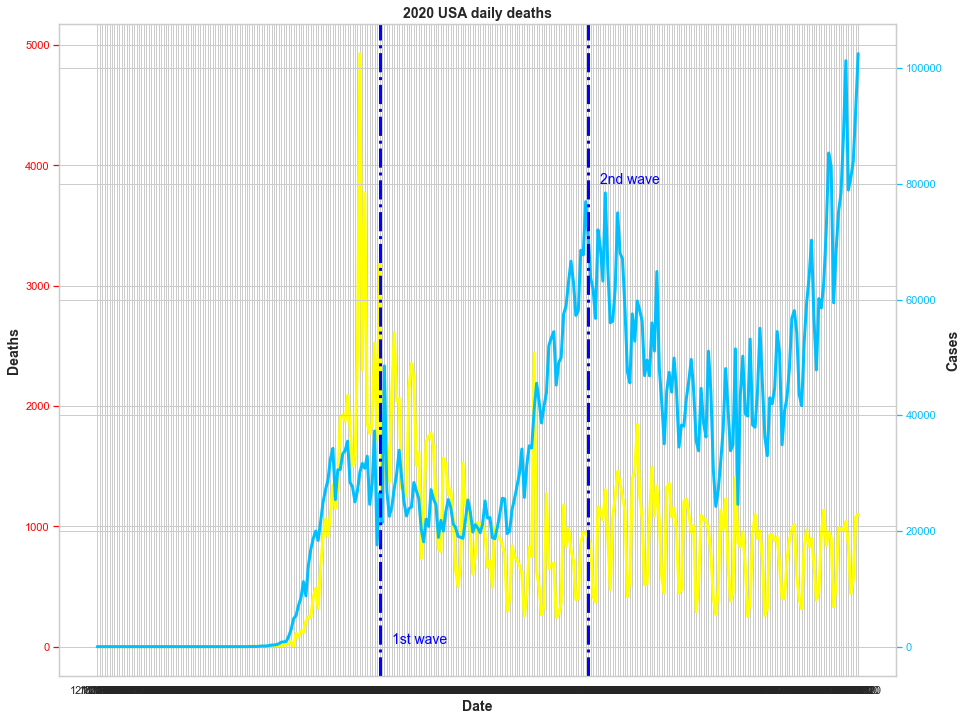

In [84]:
fig, ax1 = plt.subplots(figsize=(15,12))
ax2 = ax1.twinx()
ax1.set_title('2020 USA daily deaths',fontsize=14,fontweight='bold')
ax1.plot(df3['Date'], df3['Data.Deaths'],color='yellow',linewidth=3)
ax1.set_xlabel('Date',fontsize=14, fontweight='bold')
ax1.set_ylabel('Deaths',fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', colors='red') 
ax2.plot(df3['Date'], df3['Data.Cases'],color='deepskyblue',linewidth=3)
ax2.set_ylabel('Cases',fontsize=14,fontweight='bold')
ax2.tick_params(axis='y', colors='deepskyblue') 
plt.text(120,500,'1st wave',fontsize=14, color='blue')
ax2.axvline(115,color='blue',linestyle='dashdot', lw=3)
plt.text(205,80000,'2nd wave',fontsize=14, color='blue')
ax2.axvline(200,color='blue',linestyle='dashdot', lw=3)

#### BONUS POINT, seaborn boxplot plot COL1 & COL3 vs COL2 

##### COL1 V.S COL22 seaborn boxplot

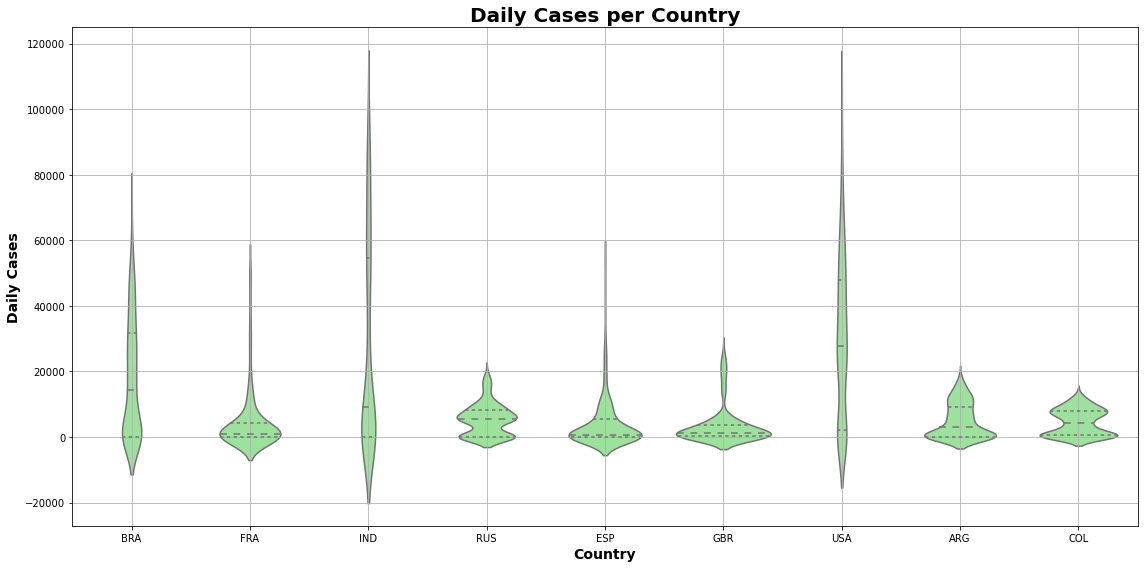

In [43]:
fig, ax = plt.subplots(figsize=(16, 8))
ax=sns.violinplot(data=df9, x="Location.Code", y="Data.Cases", ax=ax, inner='quartile', color='lightgreen')
ax.set_xlabel('Country',fontsize=14,fontweight='bold')
ax.set_ylabel('Daily Cases',fontsize=14,fontweight='bold')
ax.set_title('Daily Cases per Country', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.grid()
plt.show()

##### COL3 V.S COL22 seaborn boxplot

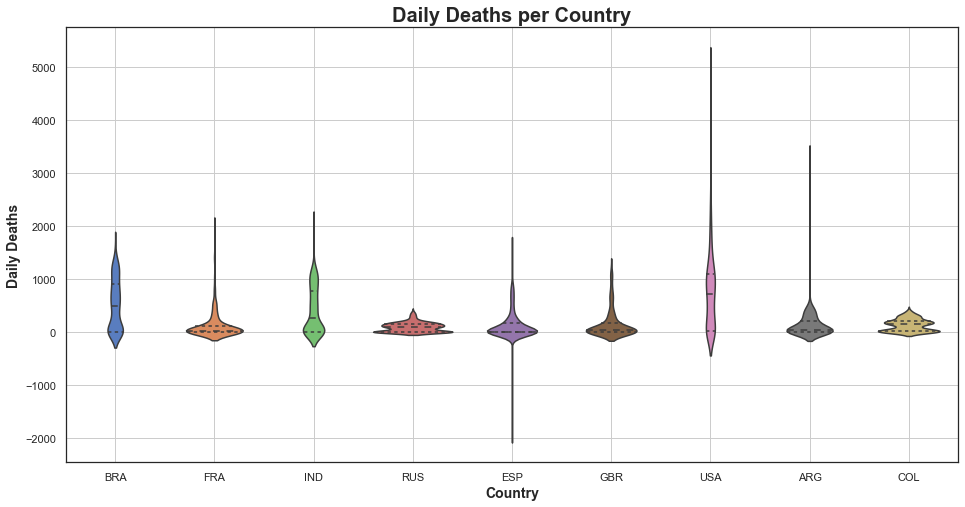

In [44]:
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(16, 8))
ax=sns.violinplot(data=df9, x="Location.Code", y="Data.Deaths", ax=ax, inner='quartile', color='forestgreen',palette="muted")
ax.set_xlabel('Country',fontsize=14,fontweight='bold')
ax.set_ylabel('Daily Deaths',fontsize=14,fontweight='bold')
ax.set_title('Daily Deaths per Country', fontsize=20, fontweight='bold')
plt.grid()

In [45]:
df11=df3.drop(65)
df10=df11.copy()
df11['Date.Month']=df10['Date.Month'].astype(int)


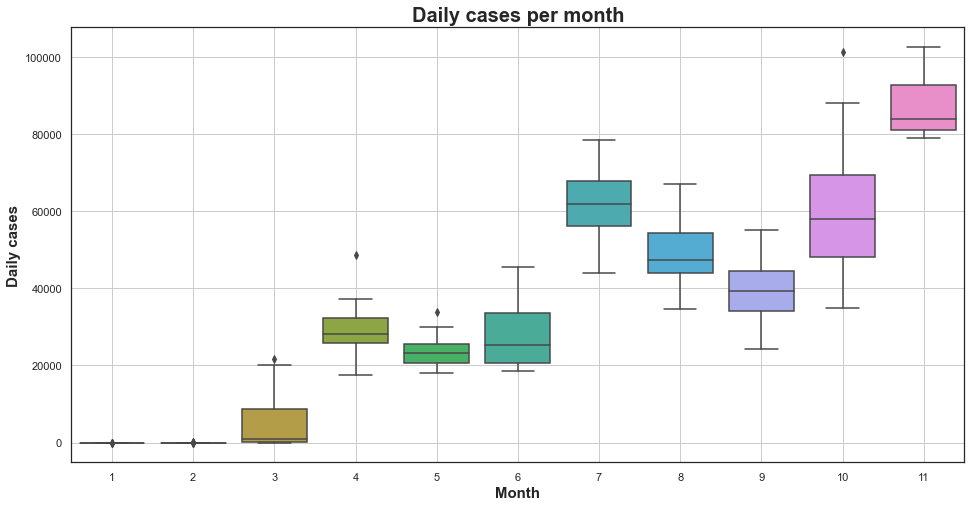

In [46]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(x="Date.Month", y="Data.Cases", data=df11, ax=ax)
ax.set_xlabel('Month',fontsize=15, fontweight='bold')
ax.set_ylabel('Daily cases',fontsize=15, fontweight='bold')
ax.set_title('Daily cases per month', fontsize=20, fontweight='bold')
plt.grid()
plt.show()

In [47]:
df

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,0,0,Afghanistan,AFG,38041757,Asia,0.000000
1,31,12,2019,0,0,Algeria,DZA,43053054,Africa,0.000000
2,31,12,2019,0,0,Armenia,ARM,2957728,Europe,0.000000
3,31,12,2019,0,0,Australia,AUS,25203200,Oceania,0.000000
4,31,12,2019,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776


In [86]:
### Thanks professor Benjamin